# 단어 빈도 그래프

◆ 루이스 캐럴의 “이상한 나라의 앨리스”는 어떤 내용일까?
◆ 구텐베르그 프로젝트(Project Gutenberg)
▪ 저작권이 만료된 영어 소설들(60,000여개)을 무료로 제공
▪ NLTK도 일부를 제공 – "이상한 나라의 앨리스"를 포함

In [1]:
import nltk
nltk.download('gutenberg') # 다운로드
from nltk.corpus import gutenberg
file_names = gutenberg.fileids() # 제공하는 파일명을 읽어와서 출력
print(file_names)

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...


['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


[nltk_data]   Unzipping corpora\gutenberg.zip.


## 토큰화 - Word_tokenize 이용
◆ NLTK word_tokenize를 이용해서 토큰화 실행
▪ 먼저 gutenberg.open().read()로 파일을 읽어 와서 문자열로 저장
▪ len()으로 길이를 출력하면 문자의 수 확인 가능
▪ 토큰화 이후 len()으로 결과를 출력하면 토큰(단어)의 수 확인 가능

In [2]:
from nltk.tokenize import word_tokenize
doc_alice = gutenberg.open('carroll-alice.txt').read()
print('Length of document:', len(doc_alice))
tokens_alice = word_tokenize(doc_alice) # word_tokenize()로 토큰화 실행
print('Num of tokens used:', len(tokens_alice))

Length of document: 144395
Num of tokens used: 33494


## 정규화 – 어간추출
◆ 포터 스테머를 이용한 어간 추출
▪ 토큰화 결과에 대해 list comprehension을 이용해 스테밍 실행
▪ 규칙을 이용해 변환하기 때문에 결과를 사람이 읽기에 좋지 않음
▪ 일반적으로 빈도 분석에서는 잘 활용하지 않는 편

In [3]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
stem_tokens_alice = [stemmer.stem(token) for token in tokens_alice]
print(stem_tokens_alice[:10]) # 앞부터 10개의 어간추출 결과를 출력

['[', 'alic', "'s", 'adventur', 'in', 'wonderland', 'by', 'lewi', 'carrol', '1865']


## 정규화 – 표제어 추출
◆ 표제어 추출
▪ 토큰화 결과에 대해 WordNetLemmatizer 실행
▪ 어간 추출에 비해 가독성이 좋은 결과를 제공

In [4]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lem_tokens_alice = [lemmatizer.lemmatize(token) for token in tokens_alice]
print(lem_tokens_alice[:10]) # 앞부터 10개의 표제어추출 결과를 출력

['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865']


## 정규 표현식을 이용한 토큰화

In [5]:
from nltk.tokenize import RegexpTokenizer
# 세 문자 이상의 단어만 추출
tokenizer = RegexpTokenizer("[\w']{3,}")
# 소문자 변환 후 토큰화 실행
reg_tokens_alice = tokenizer.tokenize(doc_alice.lower())
# 토큰의 수와 앞 10개의 토큰을 출력해서 확인
print('Num of tokens with RegexpTokenizer:', len(reg_tokens_alice))
print('Token sample:')
print(reg_tokens_alice[:10])

Num of tokens with RegexpTokenizer: 21616
Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit']


In [7]:
from nltk.corpus import stopwords # 일반적으로 분석대상이 아닌 단어들
english_stops = set(stopwords.words('english')) # 반복되지 않게 set으로 변환
# stopwords를 제외한 단어들만으로 리스트를 생성
result_alice = [word for word in reg_tokens_alice if word not in english_stops]
# 토큰의 수와 앞 10개의 토큰을 출력해서 확인
print('Num of tokens after stopword elimination:', len(result_alice))
print('Token sample:')
print(result_alice[:10])

Num of tokens after stopword elimination: 12999
Token sample:
["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice']


## 단어별 빈도 계산
◆ 딕셔너리를 이용해 단어별 빈도 계산
▪ 단어를 key로 하고 빈도를 value로 하는 딕셔너리를 생성
▪ 각 토큰에 대해 해당 단어의 빈도를 1씩 더해 줌

In [10]:
# 단어별 빈도를 담을 딕셔너리 생성
alice_word_count = dict()
for word in result_alice: # 모든 토큰에 대해
    # 단어가 아직 딕셔너리에 없으면 1을, 있으면 기존 값에 1을 더해서 저장
    alice_word_count[word] = alice_word_count.get(word, 0) + 1
# 빈도를 key로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(alice_word_count, key=alice_word_count.get, reverse=True)

In [11]:
print("Top 20 high frequency words:")
for key in sorted_word_count[:20]: #빈도수 상위 20개의 단어를 출력
    print(f'{repr(key)}: {alice_word_count[key]}', end=', ')

Top 20 high frequency words:
'said': 462, 'alice': 385, 'little': 128, 'one': 98, 'know': 88, 'like': 85, 'went': 83, 'would': 78, 'could': 77, 'thought': 74, 'time': 71, 'queen': 68, 'see': 67, 'king': 61, 'began': 58, 'turtle': 57, "'and": 56, 'way': 56, 'mock': 56, 'quite': 55, 

빈도 그래프 그리기
◆ 빈도가 높은 단어가 위에 오도록 수평 막대 그래프를 그림

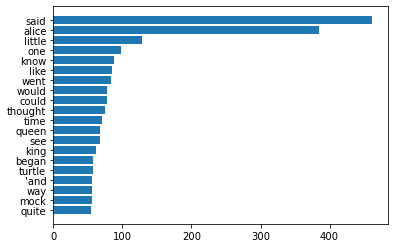

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
# 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
n = sorted_word_count[:20][::-1]
# 20개 단어에 대한 빈도
w = [alice_word_count[key] for key in n]
# 수평 막대그래프
plt.barh(range(len(n)),w,tick_label=n)
plt.show()

## 워드 클라우드 간단 실행 예제
◆ generate()로 이미지 생성 후 plt.imshow()로 출력
▪ generate()는 문자열로 이루어진 원본 문서를 인수로 사용함
▪ 결과를 보면 said, Alice 에서 자체 토큰화에 뭔가 문제가 있음

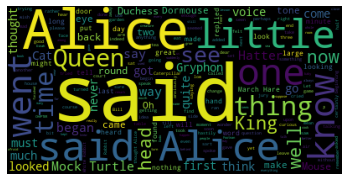

In [17]:
from wordcloud import WordCloud
# 워드 클라우드 이미지 생성
wordcloud = WordCloud()
wordcloud.generate(doc_alice)
plt.axis("off") # 축이 보이지 않게 설정
# plt.imshow()로 이미지 출력
plt.imshow(wordcloud)
plt.show()

## 단어 빈도를 활용한 워드 클라우드
◆ 원본 문서 대신 앞서 생성한 단어 빈도 딕셔너리를 사용
▪ 토큰화, 불용어 처리 등 전처리 작업 결과를 사용하고 싶을 때
◆ 추가로, 최대 폰트 크기를 설정

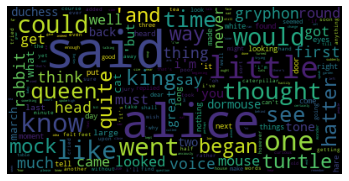

In [19]:
# 워드 클라우드 이미지 생성
wordcloud = WordCloud(max_font_size=60)
wordcloud.generate_from_frequencies(alice_word_count)
plt.axis("off") # 축이 보이지 않게 설정
# plt.imshow()로 이미지 출력
plt.imshow(wordcloud)
plt.show()

## 이미지 형태의 워드 클라우드
◆ 사각형이 아닌 이미지 형태로 워드 클라우드를 만들고 싶다면

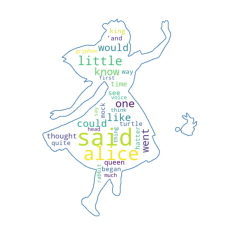

In [21]:
import numpy as np
from PIL import Image
# 사용할 배경 이미지를 불러와서 numpy array로 변환
alice_mask = np.array(Image.open("alice_mask.png"))
wc = WordCloud(background_color="white", # 배경색 지정
               max_words=30, # 출력할 최대 단어 수
               mask=alice_mask, # 배경으로 사용할 이미지
               contour_width=3, # 테두리 굵기
               contour_color='steelblue') # 테두리 색
wc.generate_from_frequencies(alice_word_count) # 워드 클라우드 생성
wc.to_file("alice.png") # 필요한 경우 결과를 이미지 파일로 저장
plt.axis("off")
plt.imshow(wc)
plt.show()

## 한글 문서의 단어 빈도 그래프
◆ 실습 대상 문서: 대한민국 헌법
▪ 전문, 본문, 부칙으로 구성
▪ KoNLPy 패키지가 제공하는 헌법 텍스트를 활용

In [23]:
from konlpy.corpus import kolaw
# NLTK와 유사한 방법으로 헌법 텍스트를 가져옴
const_doc = kolaw.open('constitution.txt').read()
print(type(const_doc)) # 가져온 데이터의 type을 확인 - 문자열
print(len(const_doc)) # 전체 문자 수 확인

<class 'str'>
18884


KoNLPy를 이용한 전처리
◆ 주로 명사에 관심이 있으므로 명사만 추출하고 한 글자 단어는 제외

In [24]:
from konlpy.tag import Okt
t = Okt()
tokens_const = t.nouns(const_doc) # 형태소 단위로 토큰화 후 명사만 추출
# 한 글자로 된 토큰은 제외
tokens_const = [token for token in tokens_const if len(token) > 1]
print('토큰의 수:', len(tokens_const))
print('앞 10개의 토큰:')
print(tokens_const[:10])

토큰의 수: 3013
앞 10개의 토큰:
['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국']


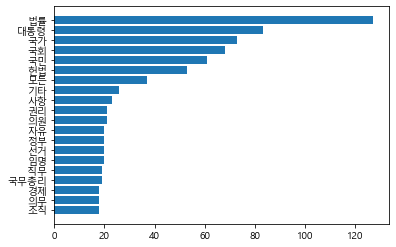

In [25]:
from matplotlib import font_manager, rc
# 그래프에서 사용할 한글 폰트를 지정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
# 단어별 빈도를 담을 딕셔너리 생성하고, 빈도 계산
const_word_count = dict()
for word in tokens_const:
    const_word_count[word] = const_word_count.get(word, 0) + 1
# 빈도를 key로 하여 단어를 빈도 역순으로 정렬
sorted_word_count = sorted(const_word_count, key=const_word_count.get, reverse=True)
# plt.barh로 그래프 출력
n = sorted_word_count[:20][::-1] # 빈도수 상위 20개의 단어를 추출해 역순으로 정렬
w = [const_word_count[key] for key in n] # 20개 단어에 대한 빈도
plt.barh(range(len(n)),w,tick_label=n) # 수평 막대그래프
plt.show()

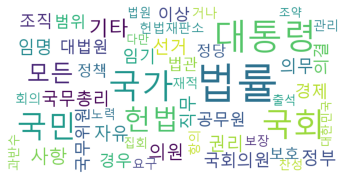

In [26]:
# WordCloud 객체에 전달할 폰트주소 생성
font_path = 'c:/Windows/Fonts/malgun.ttf'
wordcloud = WordCloud(
    font_path = font_path,
    max_font_size = 100, # 최대 폰트 크기
    width = 800, # 이미지 너비
    height = 400, # 이미지 높이
    background_color='white', # 이미지 배경색
    max_words=50) # 최대 단어 수
# 원문이 아닌 형태소 분석 결과로부터 워드 클라우드 생성
wordcloud.generate_from_frequencies(const_word_count)
wordcloud.to_file("const.png") # 생성한 이미지를 파일로 저장
plt.axis("off")
plt.imshow(wordcloud)
plt.show()